In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

0.51 0.020928414412991356 55
0.47 0.01939476289384929 55


Text(0.5, 1.0, 'Bs VS Bm Comparison of Aparna et al &Ranjan')

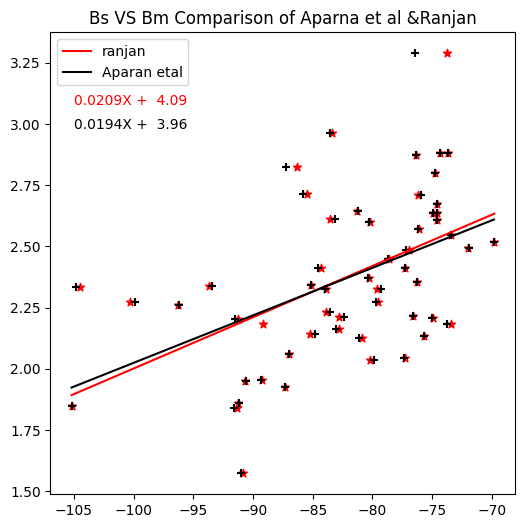

In [2]:
ap = np.loadtxt("cor_2020_aparna.dat")
rj = np.loadtxt("cor_2020_ranjan_new_bs_calc.dat")

apn, rjn= [],[]
for i in range(len(rj[:,0])):
    for j in range(len(ap[:,0])):
        if np.round(rj[i,0],1)==np.round(ap[j,0],1):
            apn.append([ap[j,0],ap[j,1]])
            rjn.append([rj[i,0],rj[i,1]])

apn = np.array(apn)
rjn  = np.array(rjn)
df = pd.DataFrame({'biomass':apn[:,0]})
df["bs_aparna"] = apn[:,1]
df["bs_ranjan"] = rjn[:,1]


bm = [np.log10(df["biomass"]),np.log10(df["biomass"])]
bs  = [df["bs_ranjan"],df["bs_aparna"]]
colors = ['r','k']
markers = ["*","+"]

labels = ["ranjan","Aparan etal"]
plt.figure(figsize=(6,6))
h = [3.08,2.98]
for i in range(2):
    corr = np.round(np.corrcoef(bs[i],bm[i])[0,1],2)        
    coef = np.polyfit(bs[i],bm[i],1)
    slope, intercept = coef
    fit_line1 = slope * np.linspace(min(bs[i]),max(bs[i]),len(bs[i])) + intercept 
    fit_line = slope * np.array(bs[i]) + intercept
    std_dev = np.std(bm[i] - fit_line1)
    upper_bound = fit_line - std_dev
    lower_bound = fit_line + std_dev
    print(corr,slope,len(bs[i]))
    plt.text(-105,h[i], str(np.round(slope,4))+'X +  '+str(np.round(intercept,2)),color=colors[i])
    plt.plot(np.linspace(min(bs[i]),max(bs[i]),len(bs[i])), fit_line1, color=colors[i],label=labels[i])
    plt.scatter(bs[i],bm[i],color=colors[i],marker=markers[i])


plt.legend()
plt.title("Bs VS Bm Comparison of Aparna et al &Ranjan")
#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/adcp_biomass/comparison_paper vs work.png",dpi=300,facecolor='w')

0.51 0.020928414412991356 55
LinregressResult(slope=0.02092841441299137, intercept=4.0943687739228185, rvalue=0.512824315706526, pvalue=6.250860791254824e-05, stderr=0.004812456672400523, intercept_stderr=0.3976413075959704)
0.47 0.01939476289384929 55
LinregressResult(slope=0.01939476289384928, intercept=3.964101111021327, rvalue=0.47425648046330793, pvalue=0.0002543652321400524, stderr=0.004945460672828782, intercept_stderr=0.4075697340884443)
0.54 0.020344967418993307 159
LinregressResult(slope=0.0203449674189933, intercept=4.014440406323499, rvalue=0.5409285221277035, pvalue=1.829432695322549e-13, stderr=0.002524635549933897, intercept_stderr=0.21980901597563582)
0.53 0.021607405105873514 65
LinregressResult(slope=0.021607405105873556, intercept=4.135239760991864, rvalue=0.534176556274023, pvalue=4.5867411365277394e-06, stderr=0.004308200011369288, intercept_stderr=0.3584604069812418)


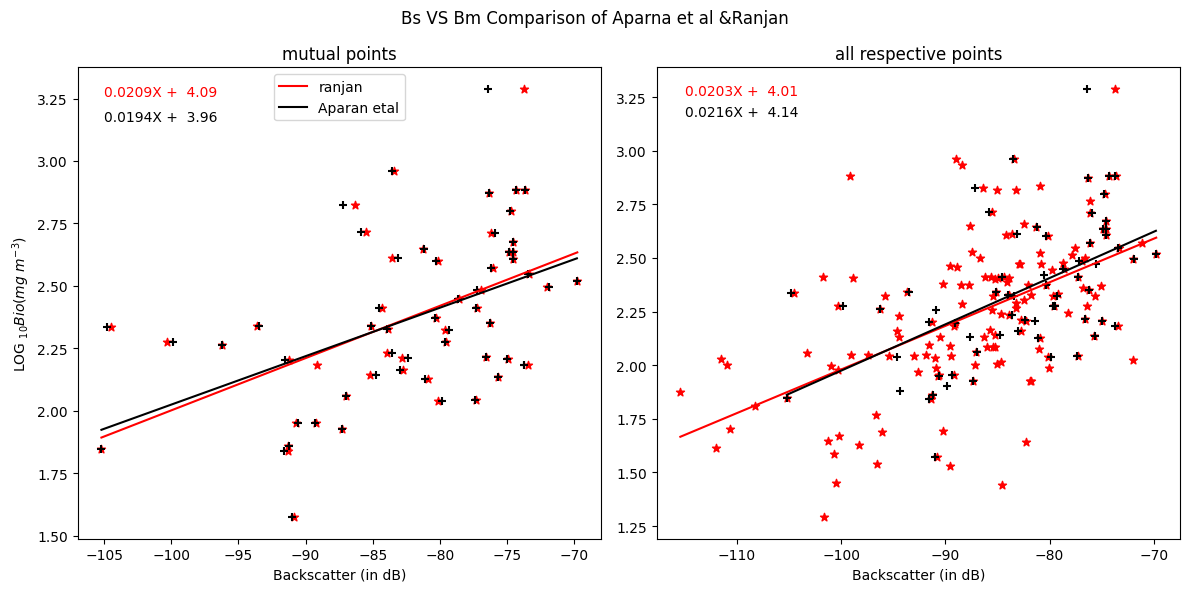

In [20]:
#
from scipy.stats import linregress

ap = np.loadtxt("cor_2020_aparna.dat")
rj = np.loadtxt("cor_2020_ranjan_new_bs_calc.dat")

apn, rjn= [],[]
for i in range(len(rj[:,0])):
    for j in range(len(ap[:,0])):
        if np.round(rj[i,0],1)==np.round(ap[j,0],1):
            apn.append([ap[j,0],ap[j,1]])
            rjn.append([rj[i,0],rj[i,1]])

apn = np.array(apn)
rjn  = np.array(rjn)
df = pd.DataFrame({'biomass':apn[:,0]})
df["bs_aparna"] = apn[:,1]
df["bs_ranjan"] = rjn[:,1]


bm = [np.log10(df["biomass"]),np.log10(df["biomass"])]
bs  = [df["bs_ranjan"],df["bs_aparna"]]
colors = ['r','k']
markers = ["*","+"]

labels = ["ranjan","Aparan etal"]


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

h = [3.26,3.16]
for i in range(2):
    ltt = linregress(bs[i],bm[i])   

    corr = np.round(np.corrcoef(bs[i],bm[i])[0,1],2)        
    coef = np.polyfit(bs[i],bm[i],1)
    slope, intercept = coef
    fit_line1 = slope * np.linspace(min(bs[i]),max(bs[i]),len(bs[i])) + intercept 
    fit_line = slope * np.array(bs[i]) + intercept
    std_dev = np.std(bm[i] - fit_line1)
    upper_bound = fit_line - std_dev
    lower_bound = fit_line + std_dev
    print(corr,slope,len(bs[i]))
    print(ltt)
    ax[0].text(-105,h[i], str(np.round(slope,4))+'X +  '+str(np.round(intercept,2)),color=colors[i])
    ax[0].plot(np.linspace(min(bs[i]),max(bs[i]),len(bs[i])), fit_line1, color=colors[i],label=labels[i])
    ax[0].scatter(bs[i],bm[i],color=colors[i],marker=markers[i])


bm = [np.log10(rj[:,0]),np.log10(ap[:,0])]
bs = [rj[:,1],ap[:,1]]

for i in range(2):
    ltt = linregress(bs[i],bm[i])   
    corr = np.round(np.corrcoef(bs[i],bm[i])[0,1],2)        
    coef = np.polyfit(bs[i],bm[i],1)
    slope, intercept = coef
    fit_line1 = slope * np.linspace(min(bs[i]),max(bs[i]),len(bs[i])) + intercept 
    fit_line = slope * np.array(bs[i]) + intercept
    std_dev = np.std(bm[i] - fit_line1)
    upper_bound = fit_line - std_dev
    lower_bound = fit_line + std_dev
    print(corr,slope,len(bs[i]))
    print(ltt)
    ax[1].text(-115,h[i], str(np.round(slope,4))+'X +  '+str(np.round(intercept,2)),color=colors[i])
    ax[1].plot(np.linspace(min(bs[i]),max(bs[i]),len(bs[i])), fit_line1, color=colors[i],label=labels[i])
    ax[1].scatter(bs[i],bm[i],color=colors[i],marker=markers[i])

ax[0].set_xlabel("Backscatter (in dB)")
ax[0].set_ylabel("LOG $_{10} Bio (mg\ m^{-3})$")
ax[1].set_xlabel("Backscatter (in dB)")

ax[0].set_title("mutual points")
ax[1].set_title("all respective points")
ax[0].legend(loc='upper center')

fig.suptitle("Bs VS Bm Comparison of Aparna et al &Ranjan")
fig.tight_layout()
#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/5bs_for_avg/biomass/comparison_paper_vs_work.png",dpi=300,facecolor='w')

In [4]:
bs = np.arange(-120,-70,1)

In [5]:
aps = 10**(0.0216 * bs +4.14)

In [6]:
rps = 10**(0.0203 * bs + 4.01)

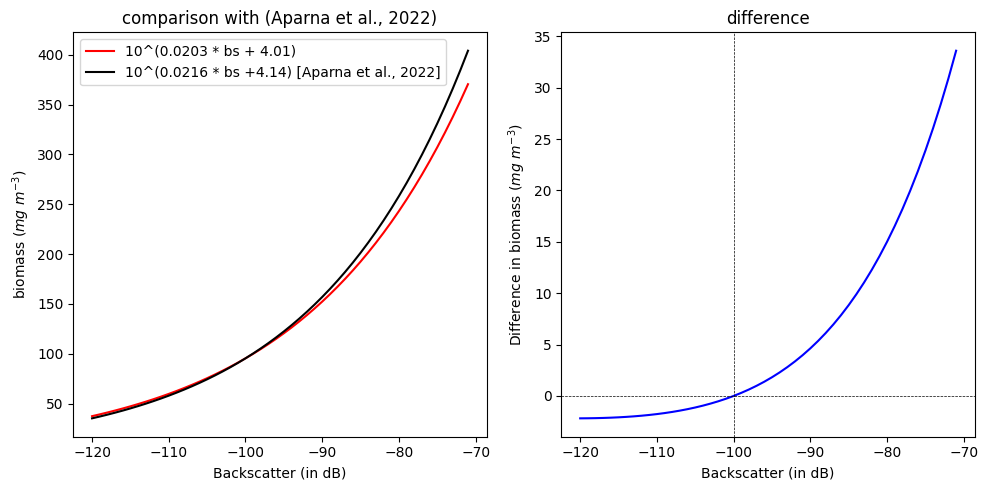

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].plot(bs,rps,label="10^(0.0203 * bs + 4.01) ",color='r')
ax[0].plot(bs,aps,label= "10^(0.0216 * bs +4.14) " + "[Aparna et al., 2022]",color='k')
ax[0].set_xlabel("Backscatter (in dB)")
ax[0].set_ylabel("biomass ($mg\ m^{-3}$)")
ax[0].legend()
ax[0].set_title("comparison with (Aparna et al., 2022)")

ax[1].plot(bs,aps-rps,color='blue')
ax[1].axhline(0,color='k',linewidth=0.5,linestyle='dashed')
ax[1].axvline(-100,color='k',linewidth=0.5,linestyle='dashed')
ax[1].set_xlabel("Backscatter (in dB)")
ax[1].set_ylabel("Difference in biomass ($mg\ m^{-3}$)")
ax[1].set_title("difference")
fig.tight_layout()
plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/5bs_for_avg/biomass/comparison_theoretical_bm_from_each_mode.png",facecolor='w',dpi=300)

# plotting the correlation.


In [56]:
import numpy as np

def least_squares_fit(x, y):
  """
  Performs a least-squares fit to a set of data points.

  Args:
    x: The independent variable data.
    y: The dependent variable data.

  Returns:
    slope: The slope of the fitted line.
    intercept: The y-intercept of the fitted line.
    se_slope: The standard error of the slope.
    se_intercept: The standard error of the intercept.
  """

  n = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x * y)
  sum_x2 = np.sum(x ** 2)

  # Calculate slope and intercept
  slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
  intercept = (sum_y - slope * sum_x) / n

  # Calculate residuals
  residuals = y - (slope * x + intercept)

  # Calculate standard errors
  se_slope = np.sqrt(np.sum(residuals ** 2) / (n - 2)) / np.sqrt(np.sum((x - np.mean(x)) ** 2))
  se_intercept = se_slope * np.sqrt(sum_x2 / n)

  return slope, intercept, se_slope, se_intercept



In [57]:
rj = np.loadtxt("cor_2020_ranjan_new_bs_calc.dat")

In [58]:
bs = rj[:,1]
bm = np.log10(rj[:,0])

In [61]:
corr = np.round(np.corrcoef(bs,bm)[0,1],2)        
coef = np.polyfit(bs,bm,1)
slope, intercept = coef
fit_line1 = slope * np.linspace(min(bs),max(bs),len(bs)) + intercept 

slope, intercept, se_slope, se_intercept = least_squares_fit(bs,bm)

high_intercept_low_slope = (slope-se_slope) * np.linspace(min(bs),max(bs),len(bs)) + (intercept - se_intercept)
low_intercept_high_slope = (slope+se_slope) * np.linspace(min(bs),max(bs),len(bs)) + (intercept + se_intercept)


fit_line = slope * np.array(bs) + intercept
std_dev = np.std(bm - fit_line1)
upper_bound = fit_line1 - std_dev
lower_bound = fit_line1 + std_dev
print(slope, intercept, se_slope, se_intercept )


0.020344967418993012 4.014440406323474 0.0025246355499338956 0.2198090159756357


In [66]:
10**((slope + se_slope)*(-100)+(intercept+se_intercept)) - 10**((slope - se_slope)*(-100)+(intercept-se_intercept))


-14.372821895371018

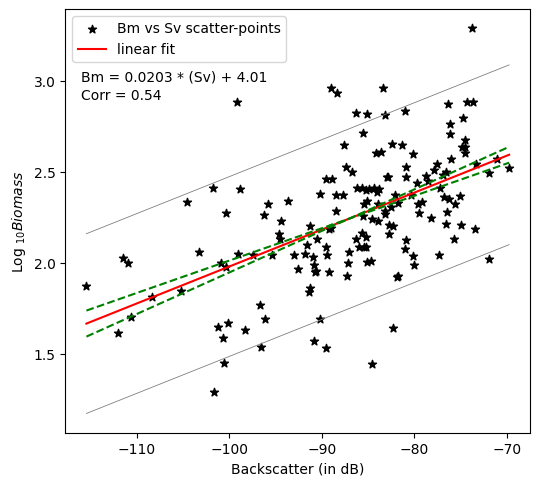

In [65]:
plt.figure(figsize=(6,5.5))

plt.scatter(bs,bm,marker = '*',color='k',label="Bm vs Sv scatter-points")
plt.plot(np.linspace(min(bs),max(bs),len(bs)), fit_line1,'r',label="linear fit")
plt.plot(np.linspace(min(bs),max(bs),len(bs)), high_intercept_low_slope,'g--')
plt.plot(np.linspace(min(bs),max(bs),len(bs)), low_intercept_high_slope,'g--')


plt.plot(np.linspace(min(bs),max(bs),len(bs)),upper_bound,'grey',linewidth=0.6)
plt.plot(np.linspace(min(bs),max(bs),len(bs)),lower_bound,'grey',linewidth=0.6)



plt.xlabel("Backscatter (in dB)")
plt.ylabel("Log $_{10} Biomass$")
plt.legend(loc="upper left")
plt.text(-116 , 3,"Bm = " + str(np.round(slope,4))+ " * (Sv) + " +str(np.round(intercept,2)))
plt.text(-116 , 2.9, "Corr = " + str(np.round(corr,2)))

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/5bs_for_avg/biomass/backscatter_vs_biomass.png",dpi=300)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/backscatter_vs_biomass.png",dpi=300)